# 演習課題3回目

11月10日(金)

## セットアップ

In [1]:
# Pythonが実行時のバージョンを満たしているか確認する
import sys
assert sys.version_info >= (3, 9, 7)

# 必要なモジュールのインポート
import itertools
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# サードパーティ製ライブラリが実行時のバージョンを満たしているか確認する
assert np.__version__ >= '1.20.3'
assert pd.__version__ >= '1.3'
assert sklearn.__version__ >= '0.24'

# データの保存場所の定義
DATA_ROOT_PATH = Path('data', '5')

## データの取得

In [2]:
from sklearn.datasets import load_wine

# CSVファイルパスの定義
WINE_PATH = DATA_ROOT_PATH / 'wine.csv'

if WINE_PATH.exists():
    wine = pd.read_csv(WINE_PATH).rename(columns={'wine_class': 'target'})
    X, y = wine.iloc[:, :-1], wine.iloc[:, -1]
else:
    # 実行時にファイルが存在しなかった場合，scikit-learnの関数から読み込む
    wine = load_wine(as_frame=True)
    X, y = wine.data, wine.target

## モデルの訓練

In [3]:
from sklearn.cluster import KMeans

features = [
    'alcohol',
    'total_phenols',
    'proanthocyanins',
    'od280/od315_of_diluted_wines',
]
X_refined = X.loc[:, features]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_refined)

In [6]:
kmeans.cluster_centers_

array([[12.12614035,  2.32140351,  1.73017544,  2.91684211],
       [13.75483871,  2.86274194,  1.95      ,  3.1316129 ],
       [13.05288136,  1.67322034,  1.07898305,  1.77050847]])

In [14]:
def scatter_by_features(ax, data: pd.DataFrame, model, feature1: int, feature2: int):
    """2つずつの特徴量を軸に取った散布図をプロットする

    Args:
        ax: Axes オブジェクト
        data: クラスタリングの訓練データ
        model: クラスタリングの訓練済みモデル
        feature1 (int): 軸に取りたい1つ目の特徴量
        feature2 (int): 軸に取りたい2つ目の特徴量

    Returns:
        ax: Axes オブジェクト
    """
    
    markers = ['o', 's', '^']
    features = [
    'alcohol',
    'total_phenols',
    'proanthocyanins',
    'od280/od315_of_diluted_wines',
    ]
    labels = model.labels_

    for value in set(labels):
        data_taken = data[labels == value]
        center_x = model.cluster_centers_[value, feature1]
        center_y = model.cluster_centers_[value, feature2]
        ax.scatter(data_taken.iloc[:, feature1], data_taken.iloc[:, feature2],
                   alpha=0.5, s=100, marker=markers[value], color='k')
        ax.scatter(center_x, center_y, s=120, marker=markers[value], color='r')
    ax.set(xlabel=features[feature1], ylabel=features[feature2])

    return ax

## グラフのプロット

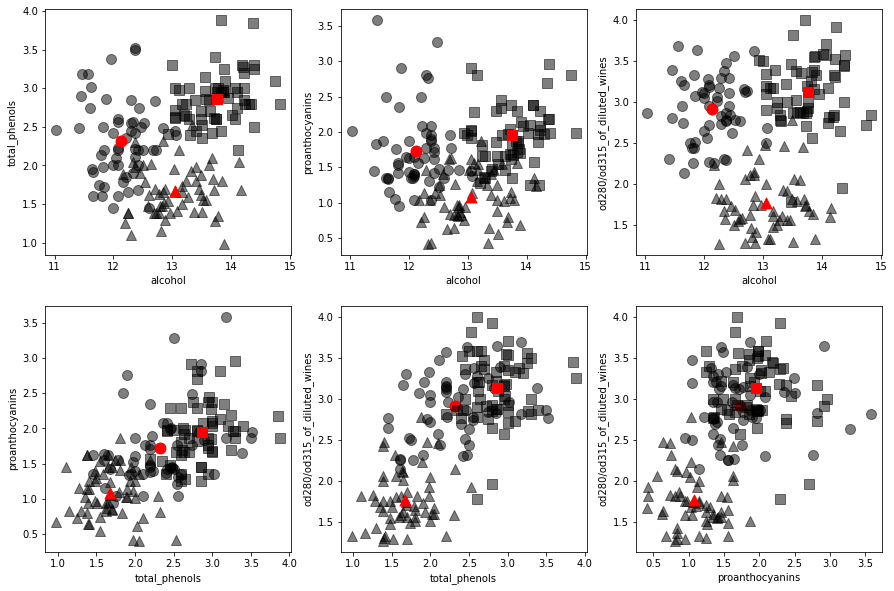

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

k = 0
for i in range(2): # 図の行数
    for j in range(3): # 図の列数
        # 特徴量のすべての組み合わせ (重複なし) を2つの変数にアンパックする
        feature1, feature2 = list(itertools.combinations([0, 1, 2, 3], 2))[k]
        ax = scatter_by_features(axs[i, j], X_refined, kmeans, feature1, feature2)
        ax.set_box_aspect(1)
        k += 1